# Artificial Beam Size Tests

** Scott Prahl**

** 16 Nov 2017, Version 2**

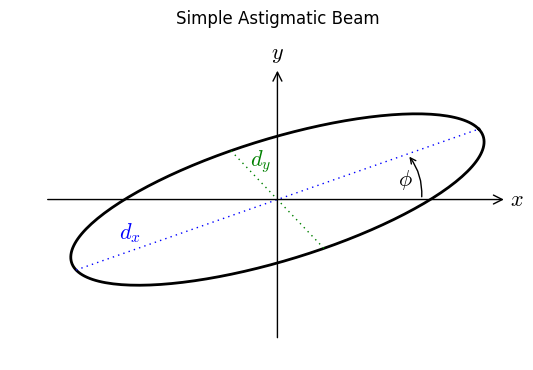

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

lbs.draw_beam_figure()

# Artificial tests

These are all artificial tests.  A perfect astigmatic Gaussian beam is generated and then noise (and/or and offset) is added to the entire image.  Examples are shown in which the default algorithm works perfectly and also fails spectacularly.  

## Thresholding

### Recall the definition for beam center

The `lbs.beam_size()` algorithm works robustly for a variety of images.  As mentioned in the literature, image artifacts outside the beam can cause dramatic errors when the ISO 11146 algorithm is used.  Consider just finding the 
center in the horizontal direction.  We calculate
$$
P = \sum_{i=0}^{N-1} \sum_{j=0}^{M-1} E_{ij}
$$
and 
$$
x_c = {1\over P} \sum_{i=0}^{N-1} \sum_{j=0}^{M-1} i \cdot E_{ij}
$$

### Simple constant backgroud
If there is a constant background so that $E_{ij}=I_{ij} + c$ then
$$
x_c \approx {1\over P} \sum_{i=0}^{N-1} \sum_{j=0}^{M-1} i I_{ij} + {c NM\over P}
$$
Because the last term is always positive, the predicted center of the beam will always be displaced to the right!

So, extra *background* across the image is problematic for locating the beam center.  Ideally, background image noise  would just be replaced with zeros.  

### Subracting minimum
The trivial solution is to just subtract the minimum value in image from the image before processing.  Unfortunately, in real images, the minimum value tends to be close to zero and very little background is removed.  

### Thresholding
A slightly less trivial solution uses the maximum value in the image $E_{max}$ and an arbitrary threshold fraction $f_{th}$.  One simply replaces all values in the image that are less than $E_{max} f_{th}$ with zero.  Currently the `lbs.beam_size()` algorithm defaults to $f_{th}$=0.1, but this is can easily be changed.

### Actual algorithm Used

With a little thought, one soon realizes that this will always result in beam diameters that are too small --- because the shoulders of the beam have been removed.  So we arrive at the method used by `lbs.beam_size()`

* First zero all pixels below a certain threshold.  Use the thresholded image to estimate the center and beam size.

* Second use these estimated values to create a mask around the beam (twice the diameter) and then reprocess the image. 

The second step allows one to use relatively large threshold that significantly truncates the shoulders of the original beam.  The second step includes the shoulders and therefore a better beam diameter can be obtained.  Because all pixels that are far from the beam are zeroed by the mask, background effects are minimized.



## Test 1. Simple, noise-free rotated elliptical beam

In this and all rest of the test functions, the maximum value in the test array is 256.

No gaussian noise, works fine!

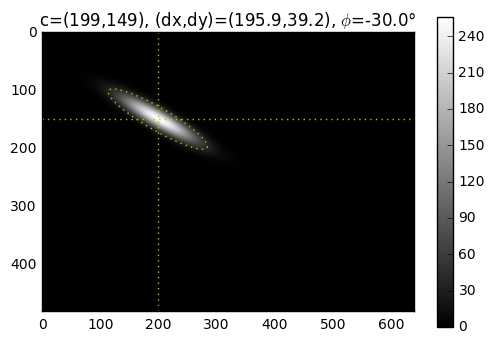

In [2]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

## Test 2. Tiny bit (2%) gaussian noise

It still works!

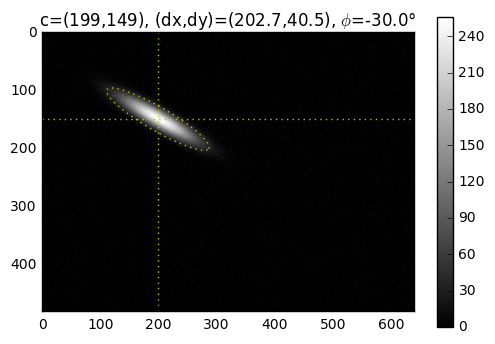

In [3]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,noise=5)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

## Test 3. Test 3 5% Gaussian Noise

The default settings do not work.  Need to increase the default threshold from 10% (0.10) to 20% (0.20)

yikes! pretty terrible with the default 10% threshold


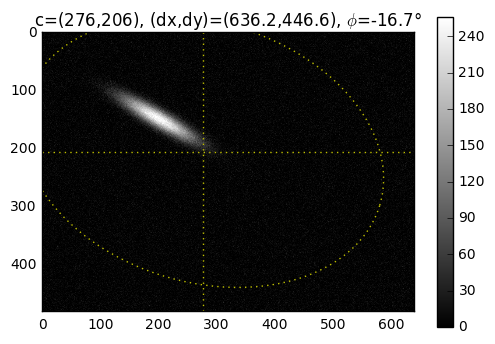

looks much better when the threshold is increased


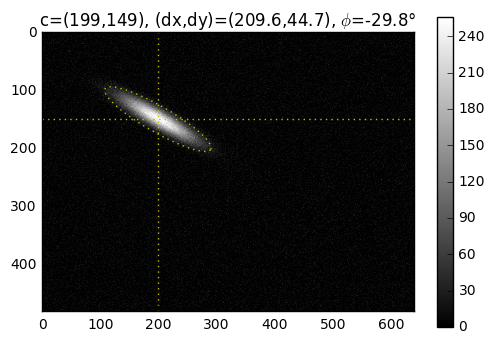

In [4]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

print('yikes! pretty terrible with the default 10% threshold')
test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,noise=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

print('looks much better when the threshold is increased')
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test, threshold=0.2)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

## Test 4. Add 5% constant offset to the entire image

This works fine.

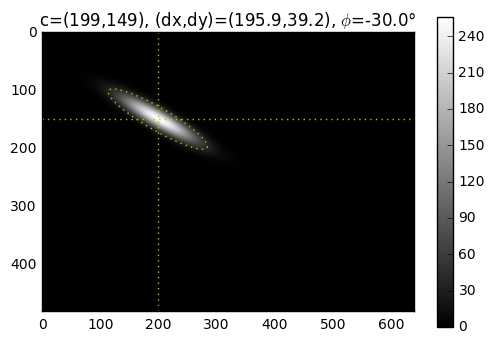

In [5]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,offset=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

## Test 5. 5% gaussian noise and a 5% offset

This fails.  It doesn't work with threshold=0.2, instead need to increase the threshold to 0.3.

Changing the threshold is easy, as shown below.

not good


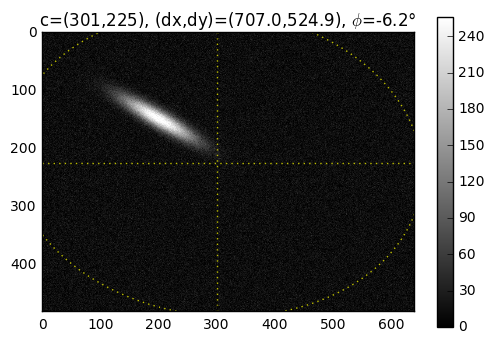

Increase default threshold, and the fit is now good


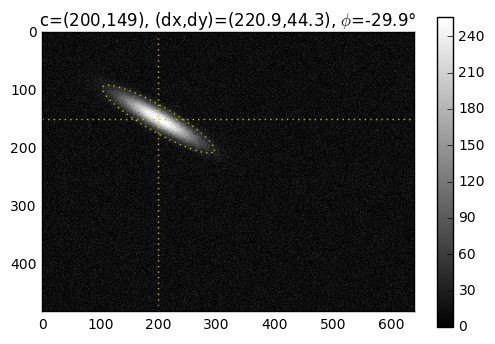

In [6]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

print('not good')
test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,offset=13,noise=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

print('Increase default threshold, and the fit is now good')

xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test, threshold=0.3)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

## Test 6.  Equal sizes

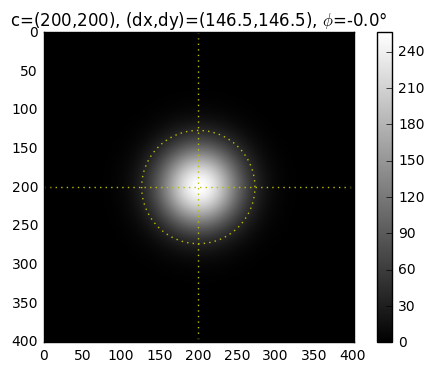

In [7]:
xc=200
yc=200
dx=150
dy=150
phi=0*np.pi/180
h=401
v=401

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()



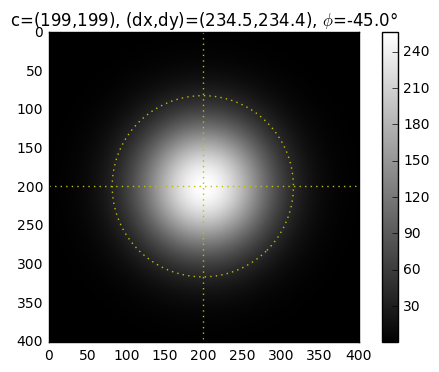

In [9]:
xc=200
yc=200
dx=240
dy=240
phi=-45*np.pi/180
h=401
v=401

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

